## Imports
**First things first ... Let's import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(we may import sklearn if we need it.)**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Let's read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [4]:
EC = pd.read_csv('Ecommerce Customers')

**Let's check the head of customers, and check out its info() and describe() methods.**

In [12]:
EC.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
EC.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

We'll only be using the numerical data of the csv file.
___
**We will use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

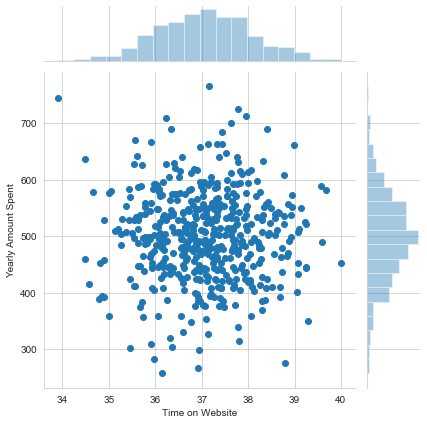

In [75]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=EC,kind='scatter')

**We have done the same but with the Time on App column instead.**

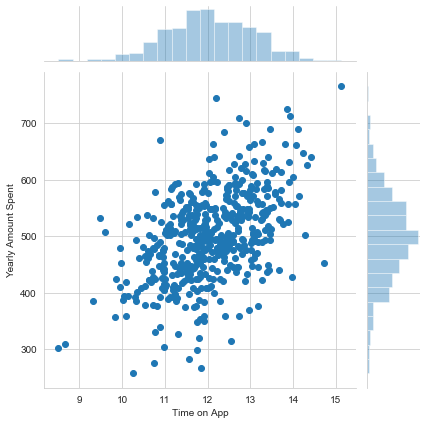

In [76]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=EC,kind='scatter')

**We will use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

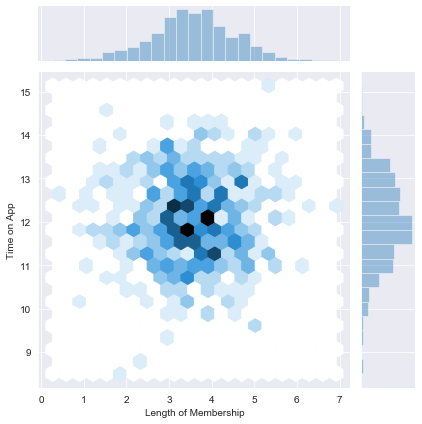

In [15]:
sns.jointplot(x='Length of Membership',y='Time on App',data=EC,kind='hex')

**Let's explore these types of relationships across the entire data set.**

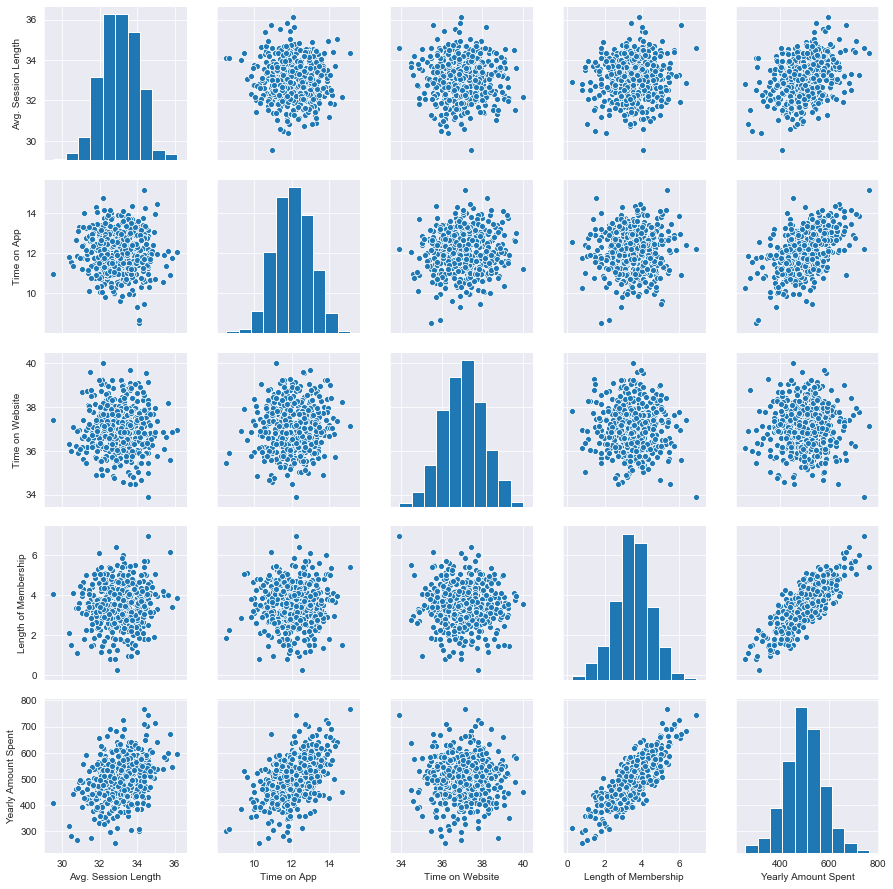

In [16]:
sns.pairplot(EC)

**A linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

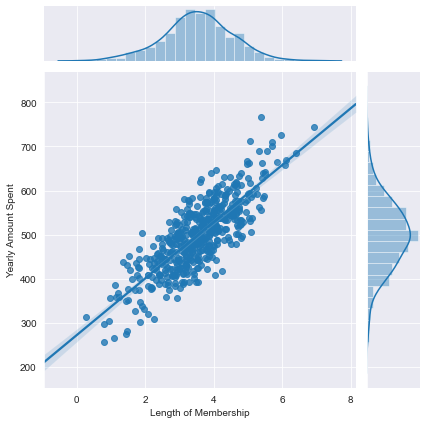

In [31]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=EC,kind='reg')

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
We will set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [42]:
X=EC[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [43]:
y=EC['Yearly Amount Spent']

Now we will use model_selection.train_test_split from sklearn to split the data into training and testing sets & set test_size=0.3 and random_state=101

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
df=pd.DataFrame(lr.coef_)
df

,0
0,25.981550
1,38.590159
2,0.190405
3,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [50]:
predictions=lr.predict(X_test)

A scatterplot of the real test values versus the predicted values

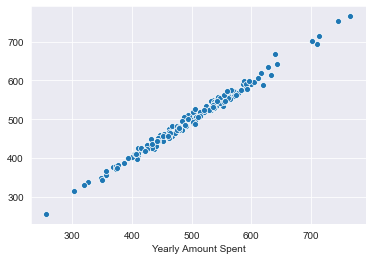

In [51]:
sns.scatterplot(x=y_test,y=predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

We will now calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

In [56]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

7.228148653430853

## Residuals

We must have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 


## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.



In [54]:
df=pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [60]:
metrics.mean_squared_error(y_test,predictions)   

79.81305165097487

In [59]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))          

8.933815066978656